# Importing Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud

from collections import Counter


# Importing Data

In [ ]:
# These are all data frames without cleaning and specific column selection 

argentina=pd.read_csv('argentina.csv')
gaza=pd.read_csv('gaza.csv')
israel=pd.read_csv('israel.csv')
milei=pd.read_csv('milei.csv')
missuniverse=pd.read_csv('MissUniverseThailand2023.csv')
ons=pd.read_csv('ons.csv')
spotify=pd.read_csv('spotify.csv')
thanksgiving=pd.read_csv('thanksgiving.csv')
trump=pd.read_csv('trump.csv')
twitter=pd.read_csv('twitter.csv')

# List of uncleaned df 
df_uncleaned_list=[argentina,gaza,israel,milei,ons,spotify,thanksgiving,trump,twitter,missuniverse] 

In [ ]:
# Chech shape of uncleaned data frames

for df in df_uncleaned_list:
    print(df.shape)

# Create DF to work with

In [ ]:
# List with columns of interest to our analysis

column_list=['id', 'created_at', 'in_reply_to_id', 'in_reply_to_account_id','tags','language', 'replies_count', 'reblogs_count', 'favourites_count',
 'content','spoiler_text','media_attachments','mentions','account.id', 'account.username','account.display_name', 'account.bot','account.created_at', 
'account.followers_count', 'account.following_count', 'account.statuses_count', 'account.last_status_at']

In [ ]:
# Create dataframes with specific columns form column_list

df_argentina=argentina[column_list]
df_gaza=gaza[column_list]
df_israel=israel[column_list]
df_milei=milei[column_list]
df_missuniverse=missuniverse[column_list]
df_spotify=spotify[column_list]
df_thanksgiving=thanksgiving[column_list]
df_trump=trump[column_list]
df_twitter=twitter[column_list]
df_ons=ons[column_list]

In [ ]:
# List of data frames with same columns 

df_list_final=[df_argentina,df_gaza,df_israel,df_milei,df_missuniverse,df_spotify,df_thanksgiving,df_trump,df_twitter,df_ons]

In [ ]:
# Create df from all individual dataframes: note that columns have not been cleaned before

df=pd.concat(df_list_final)#%%HTML

In [ ]:
df.shape

In [ ]:
# final dataframe with uncleaned olumn 'content' (which stil includes HTML tags etc.)
df.columns

In [ ]:
# the final cleaned version is to be found in Danielle's repo on github, it is called mastodon_final_v2.csv
df_cleaned=pd.read_csv('mastodon_final_v2.csv')

### Most popular Hashtags amongst sample

In [ ]:
from collections import Counter

# Assuming you have already defined df_list
# df_list = [argentina, gaza, israel, milei, ons, spotify, thanksgiving, trump, twitter]

# Extract hashtags from the 'tags' column in each DataFrame
all_hashtags = []

for df in df_list_final:
    if 'tags' in df.columns:
        hashtags = df['tags'].apply(lambda x: [] if pd.isna(x) else [tag['name'] for tag in eval(x)])
        all_hashtags.extend(hashtag for hashtags_list in hashtags for hashtag in hashtags_list)

# Count the occurrences of each hashtag
hashtag_counts = Counter(all_hashtags)

# Display the most common hashtags
most_common_hashtags = hashtag_counts.most_common(10)  # Change 10 to the desired number of top hashtags
for hashtag, count in most_common_hashtags:
    print(f'{hashtag}: {count} occurrences')

TODO

- plot this
- compare with https://www.twitter-trending.com/worldwide/statistics in a plot - twitter_hastag_list which is ordered by most occurences:: plot this against

In [ ]:
#import matplotlib.pyplot as plt
#import pandas as pd
#from collections import Counter

# Assuming you have already defined df_list_final
# df_list_final = [argentina, gaza, israel, milei, ons, spotify, thanksgiving, trump, twitter]

# Assuming you have already defined the code to extract hashtags and count occurrences

# Extract hashtags and count occurrences
all_hashtags = []
for df in df_list_final:
    if 'tags' in df.columns:
        hashtags = df['tags'].apply(lambda x: [] if pd.isna(x) else [tag['name'] for tag in eval(x)])
        all_hashtags.extend(hashtag for hashtags_list in hashtags for hashtag in hashtags_list)

# Count the occurrences of each hashtag
hashtag_counts = Counter(all_hashtags)

# Display the most common hashtags
most_common_hashtags = hashtag_counts.most_common(10)  # Change 10 to the desired number of top hashtags

# Create a DataFrame from the most common hashtags
df_most_common = pd.DataFrame(most_common_hashtags, columns=['Hashtag', 'Occurrences'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df_most_common['Hashtag'], df_most_common['Occurrences'], color='skyblue')
plt.xlabel('Hashtags')
plt.ylabel('Occurrences')
plt.title('Top Hashtags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

### Daily Posts Trend for Hashtag #milei

In [ ]:
df.created_at

In [ ]:
# Convert 'created_at' column to datetime
df_milei['created_at'] = pd.to_datetime(df_milei['created_at'])

# Resample to get daily counts
daily_counts = df_milei.resample('D', on='created_at').count()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_counts['id'], marker='o', linestyle='-')
plt.title('Daily Posts Trend for Hashtag #miley')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# # Convert 'created_at' column to datetime
# df_milei['created_at'] = pd.to_datetime(df_milei['created_at'])

# # Resample to get daily counts
# daily_counts = df_milei.resample('D', on='created_at').count()

# Create Plotly figure
fig = go.Figure()

# Add scatter (line plot) to the figure
fig.add_trace(go.Scatter(x=daily_counts.index, 
                         y=daily_counts['id'], 
                         mode='lines+markers', 
                         name='posts'))

# Update title and axis 
fig.update_layout(
    title='Daily Posts Trend for Hashtag #milei',
    xaxis_title='Date',
    yaxis_title='Number of Posts',
    xaxis=dict(tickangle=45),
    template="plotly_white"  
)

fig.show()


TODO

* Analyse all hastags individually, check when posts with hashtags were most active.
* Find reasons for this: e.g. is it due to events like elections?
* Make it pretty :) highlight important events with colors, or arrows or whatever suitable 


RESULTS/FINDINGS



Content Analysis (content, spoiler_text, media_attachments)
Visualize the most common words in posts with these hashtags. (word cloud?)
Analyse the nature of content e.g. text, media etc.

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt
#from wordcloud import WordCloud
#from collections import Counter
#import seaborn as sns

# Assuming df_list is a list containing DataFrames for the 10 hashtags
df_list_final=[df_argentina,df_gaza,df_israel,df_milei,df_missuniverse,df_spotify,df_thanksgiving,df_trump,df_twitter,df_ons]
# Concatenate the DataFrames in df_list
merged_df = pd.concat(df_list_final, ignore_index=True)

# Extract relevant columns for content analysis
content_cols = ['content', 'spoiler_text', 'media_attachments']
content_df = merged_df[content_cols].copy()

# Combine content columns into a single text column
content_df['combined_content'] = content_df['content'].astype(str) + ' ' + content_df['spoiler_text'].astype(str)

# Function to extract words from text
def extract_words(text):
    return [word.lower() for word in text.split()]

# Apply the extract_words function to the combined content
all_words = content_df['combined_content'].apply(extract_words).explode()

# Create a word cloud
#wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Plot the word cloud
#plt.figure(figsize=(10, 6))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.title('Word Cloud for Combined Content')
#plt.show()

# Analyze the nature of content (text, media)
content_df['has_media'] = content_df['media_attachments'].apply(lambda x: 1 if pd.notna(x) and x != '[]' else 0)

# Count the occurrences of each content type
content_type_counts = content_df['has_media'].value_counts()

# Plot a bar chart for content type distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')
plt.title('Distribution of Content Types')
plt.xlabel('Has Media')
plt.ylabel('Count')
plt.show()

### User Engagement Analysis

In [ ]:
#Convert 'created_at' column to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

#Resample to get daily engagement metrics
daily_engagement = df.resample('D', on='created_at').sum()

#Plotting using Plotly graph_objects
fig = go.Figure()

#Add traces for likes, shares, and comments
fig.add_trace(go.Scatter(x=daily_engagement.index, y=daily_engagement['replies_count'], mode='lines+markers', name='Likes'))
fig.add_trace(go.Scatter(x=daily_engagement.index, y=daily_engagement['reblogs_count'], mode='lines+markers', name='Shares'))
fig.add_trace(go.Scatter(x=daily_engagement.index, y=daily_engagement['favourites_count'], mode='lines+markers', name='Comments'))

#Update layout
fig.update_layout(
    title='Daily Engagement Metrics',
    xaxis_title='Date',
    yaxis_title='Count'
)

fig.show()

#Follower growth analysis
fig_follower = go.Figure()

#Add trace for follower count
fig_follower.add_trace(go.Scatter(x=df['created_at'], y=df['followers'], mode='lines+markers', name='Followers'))

#Update layout
fig_follower.update_layout(
    title='Follower Growth Over Time',
    xaxis_title='Date',
    yaxis_title='Follower Count'
)

fig_follower.show()

TODO

* Check summary statistics i.e., number of retweets ('reblogs_count'), how often did people like/favourite a toot- check if there is different engagement accross different hashtags
* Compare engagement across the 10 hashtags.
* Come up with a good plot 

In [ ]:
# Concatenate the DataFrames in df_list
merged_df = pd.concat(df_list_final, ignore_index=True)

# Extract relevant columns for engagement analysis
engagement_cols = ['replies_count', 'reblogs_count', 'favourites_count']
engagement_df = merged_df[['tags'] + engagement_cols].copy()

# Extract hashtags from the 'tags' column
engagement_df['tags'] = engagement_df['tags'].apply(lambda x: [] if pd.isna(x) else [tag['name'] for tag in eval(x)])

# Explode the list of hashtags into separate rows
engagement_df = engagement_df.explode('tags')

# Group by hashtag and calculate mean engagement metrics
engagement_summary = engagement_df.groupby('tags')[engagement_cols].mean()

# Print summary statistics
print("Summary Statistics for User Engagement Metrics:")
print(engagement_summary.describe())

# Compare engagement metrics across hashtags using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='tags', y='value', hue='variable', data=pd.melt(engagement_df, id_vars=['tags'], value_vars=engagement_cols))
plt.title('Comparison of User Engagement Metrics Across Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Engagement Metric')
plt.show()

df_argentina=argentina[column_list]
df_gaza=gaza[column_list]
df_israel=israel[column_list]
df_milei=milei[column_list]
df_missuniverse=missuniverse[column_list]
df_spotify=spotify[column_list]
df_thanksgiving=thanksgiving[column_list]
df_trump=trump[column_list]
df_twitter=twitter[column_list]
df_ons=ons[column_list]

RESULTS/FINDINGS

* 

### Language Distribution Analysis


In [ ]:
# Select data
language_distribution = df_milei['language'].value_counts()

# Plotting 
plt.figure(figsize=(10, 6))

language_distribution.plot(kind='bar')
plt.title('Number of posts per Hashtag #milei in specifc language')
plt.xlabel('Language')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Select data
language_distribution = df_argentina['language'].value_counts()

# Plotting 
plt.figure(figsize=(10, 6))

language_distribution.plot(kind='bar')
plt.title('Number of posts per Hashtag #Argentina in specifc language')
plt.xlabel('Language')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

TODO

* Analyse which languages are used within these hashtags.
* compare languages used amongst all  hashtags: what are the most common languages ?
* Make it pretty :)

RESULTS/FINDINGS

* 

### Content Analysis - Word Cloud

In [ ]:
# Ensure all columns are of string type
df_milei['content'] = df_milei['content'].astype(str)
df_milei['spoiler_text'] = df_milei['spoiler_text'].astype(str)
df_milei['media_attachments'] = df_milei['media_attachments'].astype(str)

# Concatenate strings from different columns
combined_text = df_milei['content'] + " " + df_milei['spoiler_text'] + " " + df_milei['media_attachments']

# Combine all rows into a single string
combined_text_str = combined_text.sum()

# Generating word cloud


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text_str)


# List of words to exclude
stopwords=set(
    ['https','href','js','nofollow','noopener','noreferrer','target','blank','class','span','tags','height','width',
    'media_attachments','url'])

# Generating word cloud with stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=stopwords).generate(combined_text_str)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


TODO

* Visualize the most common words in posts with these hashtags. with a word cloud
* use the cleaned content column from the new cleaned dataframe (from Danielle)
* Analyse the results: compare word cloud for different hashtags and all hashtags or what are the most prominent words amongst all toots?

RESULTS/FINDINGS

* 

In [ ]:
# Convert 'account.created_at' to datetime
for df in df_list_final:
    df['account.created_at'] = pd.to_datetime(df['account.created_at'])

# Calculate account ages
for df in df_list_final:
    df['account_age'] = (pd.to_datetime('today') - df['account.created_at']).dt.days

# Plot age distribution
plt.figure(figsize=(10, 6))
for df, hashtag in zip(df_list_final, ['argentina', 'gaza', 'israel', 'milei', 'missuniverse', 'spotify', 'thanksgiving', 'trump', 'twitter', 'ons']):
    sns.histplot(df['account_age'], kde=True, label=f'#{hashtag}', alpha=0.7)

plt.title('Account Age Distribution for Hashtags')
plt.xlabel('Account Age (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

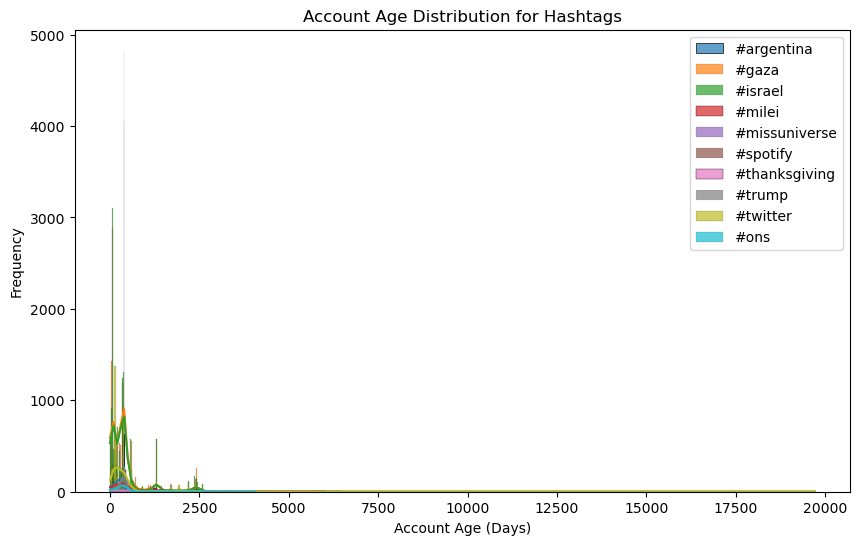

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
mastodon_final = pd.read_csv('Mastodon_Final.csv')

# Convert 'created_at' to datetime if not already and localize to UTC
mastodon_final['account.created_at'] = pd.to_datetime(mastodon_final['account.created_at'], utc=True)

# Calculate account ages
mastodon_final['account_age'] = (pd.to_datetime('today', utc=True) - mastodon_final['account.created_at']).dt.days

# Plot age distribution
plt.figure(figsize=(10, 6))
for hashtag in ['argentina', 'gaza', 'israel', 'milei', 'missuniverse', 'spotify', 'thanksgiving', 'trump', 'twitter', 'ons']:
    hashtag_df = mastodon_final[mastodon_final['tags'].str.contains(hashtag, case=False, na=False)]
    sns.histplot(hashtag_df['account_age'], kde=True, label=f'#{hashtag}', alpha=0.7)

plt.title('Account Age Distribution for Hashtags')
plt.xlabel('Account Age (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
#import pandas as pd
import plotly.express as px

# Load data
mastodon_final = pd.read_csv('Mastodon_Final.csv')

# Convert 'created_at' to datetime if not already and localize to UTC
mastodon_final['account.created_at'] = pd.to_datetime(mastodon_final['account.created_at'], utc=True)

# Calculate account ages
mastodon_final['account_age'] = (pd.to_datetime('today', utc=True) - mastodon_final['account.created_at']).dt.days

# Create a Plotly histogram
fig = px.histogram(mastodon_final,
                   x='account_age',
                   color='tags',
                   labels={'account_age': 'Account Age (Days)', 'tags': 'Hashtag'},
                   marginal='box',  # Add box plot on the marginal axis
                   opacity=0.7,
                   nbins=30  # Adjust the number of bins as needed
                   )

# Update layout
fig.update_layout(
    title='Account Age Distribution for Hashtags',
    xaxis_title='Account Age (Days)',
    yaxis_title='Frequency',
    barmode='overlay'  # Overlay the histograms for different hashtags
)

# Show the plot
fig.show()